In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Student_Performance.csv")

In [4]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [12]:
df_onehot = pd.get_dummies(df,columns=["Extracurricular Activities"],drop_first=True)

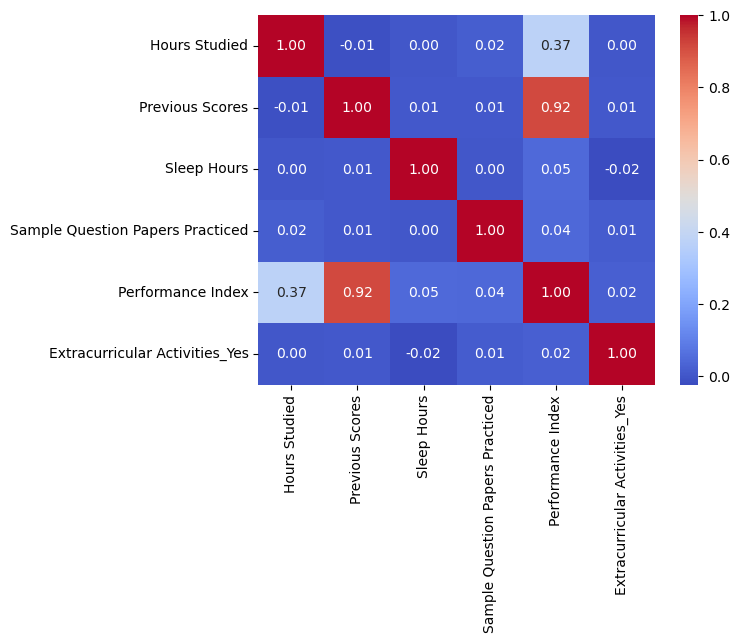

In [13]:
df_corr = df_onehot.corr()

sns.heatmap(df_corr, fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
df_onehot.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'Extracurricular Activities_Yes'],
      dtype='object')

In [21]:
df = df_onehot
X = df[['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced','Extracurricular Activities_Yes']]
y = df["Performance Index"]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.info() # verimizi bölmduk 8000 - 2000

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     8000 non-null   int64
 1   Previous Scores                   8000 non-null   int64
 2   Sleep Hours                       8000 non-null   int64
 3   Sample Question Papers Practiced  8000 non-null   int64
 4   Extracurricular Activities_Yes    8000 non-null   bool 
dtypes: bool(1), int64(4)
memory usage: 320.3 KB


In [27]:
y_train

9254    36.0
1561    25.0
1670    59.0
6087    22.0
6669    40.0
        ... 
5734    48.0
5191    51.0
5390    44.0
860     20.0
7270    24.0
Name: Performance Index, Length: 8000, dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train # scaling de yaptik simdi model olusturup egitmekte 

array([[ 0.00645547, -1.18384439,  0.26988848,  0.13404112, -0.98930717],
       [-1.14974745, -1.24150571,  0.26988848,  0.48356164,  1.01080841],
       [-1.14974745,  0.66131759,  0.26988848, -0.91452044, -0.98930717],
       ...,
       [ 1.54805935, -1.24150571,  0.26988848,  0.48356164, -0.98930717],
       [-1.53514842, -1.29916702,  1.4474766 , -1.61356148, -0.98930717],
       [-1.14974745, -1.35682833, -0.31890558,  0.48356164, -0.98930717]])

In [35]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
regression = LinearRegression()

In [37]:
regression.fit(X_train,y_train)

LinearRegression()

Mean Absulute Error:  1.6111213463123044
Mean Square Error:  4.082628398521855
R2 Error:  0.9889832909573145


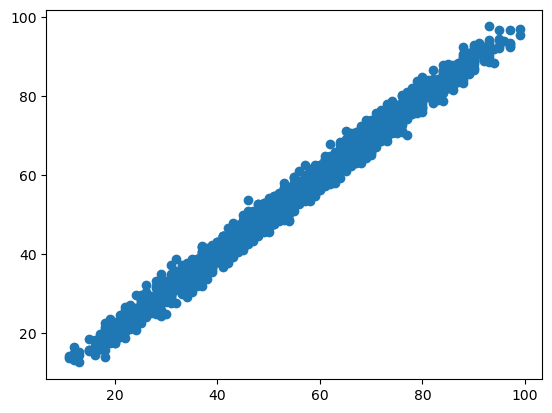

In [40]:
y_predict = regression.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_predict)
plt.show()

Mean Absulute Error:  1.6112232352490103
Mean Square Error:  4.083211446953204
R2 Error:  0.9889817176387807


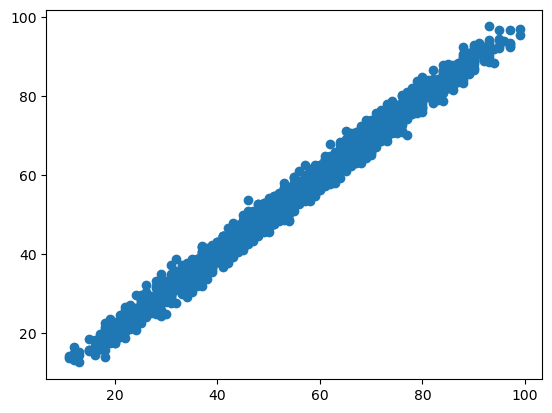

In [41]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_predict = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_predict)
plt.show()

Mean Absulute Error:  2.1684111876507606
Mean Square Error:  7.516812669226591
R2 Error:  0.9797163665115288


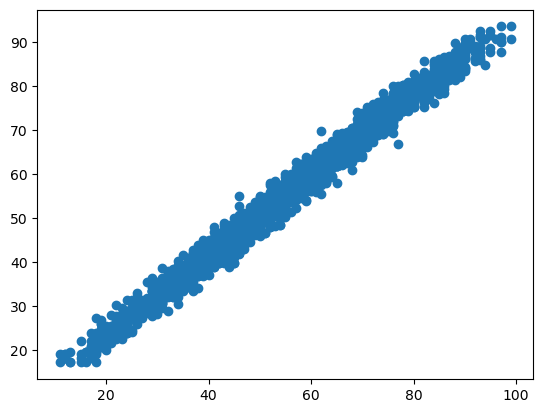

In [42]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_predict = lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_predict)
plt.show()

Mean Absulute Error:  6.041052462781596
Mean Square Error:  52.78649653950851
R2 Error:  0.8575590484872346


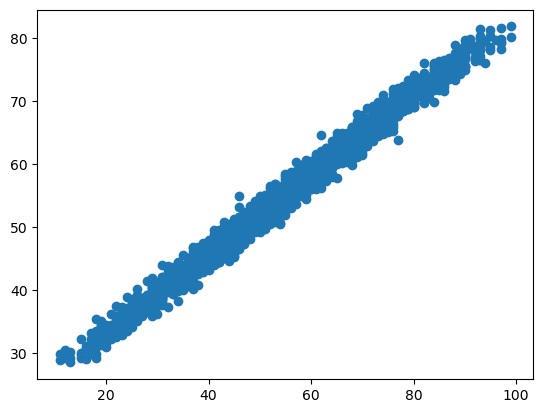

In [43]:
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)
y_predict = elasticnet.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print("Mean Absulute Error: ", mae)
print("Mean Square Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_predict)
plt.show()

In [44]:
# the best model Linear Regression

In [45]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle

In [47]:
reg_lazy = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [49]:
models, predictions = reg_lazy.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

  File "C:\Users\omerf\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\omerf\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\omerf\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\omerf\anaconda3\Lib\subprocess.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 5
[LightGBM] [Info] Start training from score 55.311500
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RANSACRegressor                              0.99       0.99  2.02        0.02
HuberRegressor                               0.99       0.99  2.02        0.05
LassoLarsCV                                  0.99       0.99  2.02        0.02
OrthogonalMatchingPursuitCV                  0.99       0.99  2.02        0.02
LinearRegression                             0.99       0.99  2.02        0.01
LassoLarsIC                                 